# Attack rates of simple model
Starting by looking at the distribution of attack rates for the simple model


In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from basic_epidemic import simulate, calculate_r0
from grab_data import *
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [29]:
DATASET = 'CENSUS_SUBSAMPLED'
flow_matrix = get_matrix(DATASET)
population_sizes = get_population_sizes(DATASET)
population_names = get_population_ordering(DATASET)

In [30]:
params = dict(gamma=0.45, psi=0.6, flow_matrix=flow_matrix, population_sizes=population_sizes,
              seed_patch=0)
def final_size_dist(beta, k=30):
    samples = np.zeros(shape=(k, flow_matrix.shape[0]))
    for j in range(k):
        s, i, _ = simulate(beta=beta, **params)
        while i.sum(axis=(0, 1)) / (population_sizes.sum()) < 0.01:
            s, i, _ = simulate(beta=beta, **params)
        samples[j, :] = 1 - s[-1, :]/population_sizes
    return samples.T

In [31]:
n_samples = 30
betas = [1.,1.2,1.3,1.8, 2.5]
colors = ['r','g','b','c','y']

r0s = [np.round(calculate_r0(beta=b, gamma=params['gamma'], psi=params['psi'], flow_matrix=flow_matrix, population_sizes=population_sizes),2) for b in betas]
dists = np.array([final_size_dist(beta=b, k=n_samples) for b in betas])

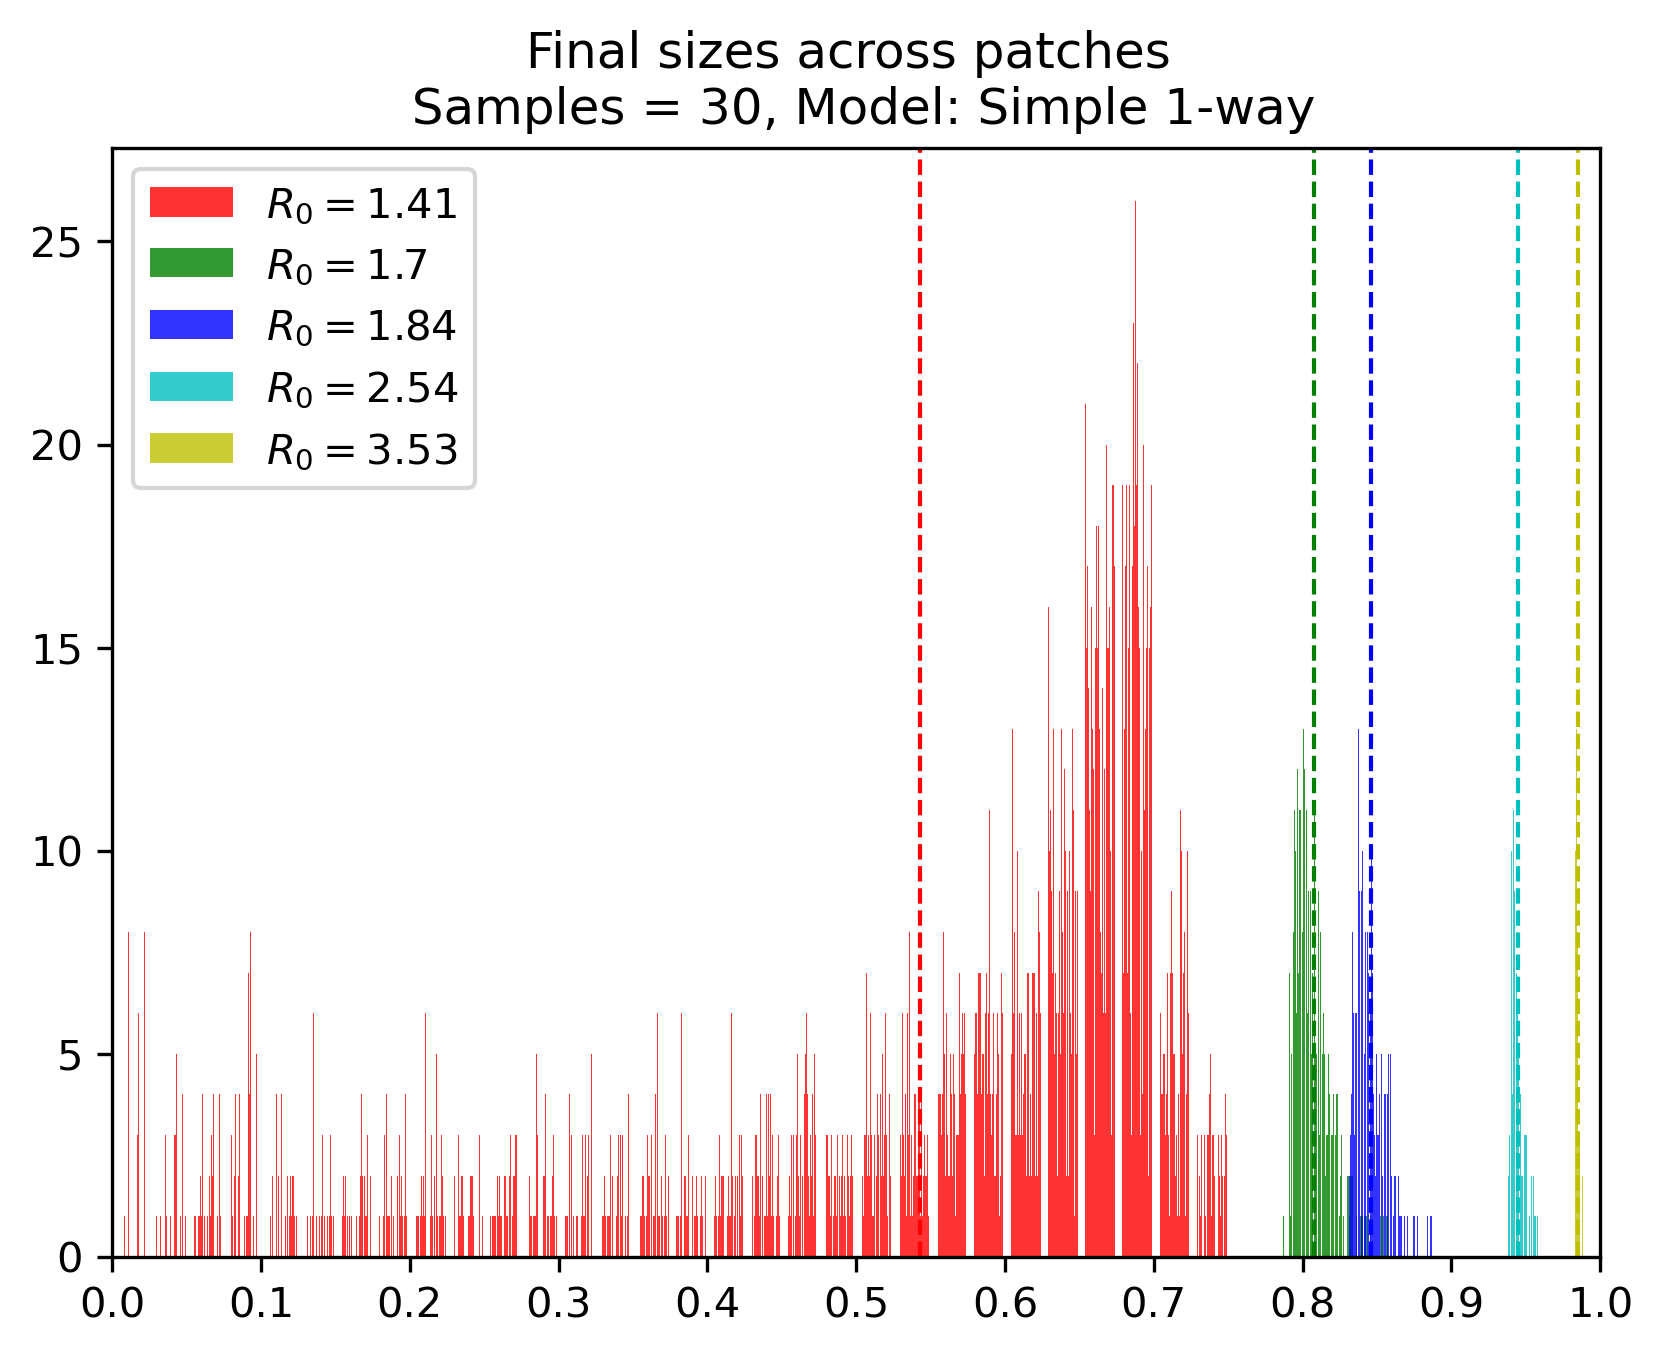

In [32]:
for k,dist in  enumerate(dists):
    plt.hist(dist, bins=n_samples, color=[colors[k] for _ in range(n_samples)], label=f'$R_0 = {r0s[k]}$', alpha=0.8)
    plt.axvline(np.mean(dist, axis=(0,1)), color=colors[k], linestyle='dashed', linewidth=1)
plt.title(f'Final sizes across patches \n Samples = {n_samples}, Model: Simple 1-way')
plt.legend()
plt.xlim(0,1)
plt.xticks(np.linspace(0,1,11))
plt.show()

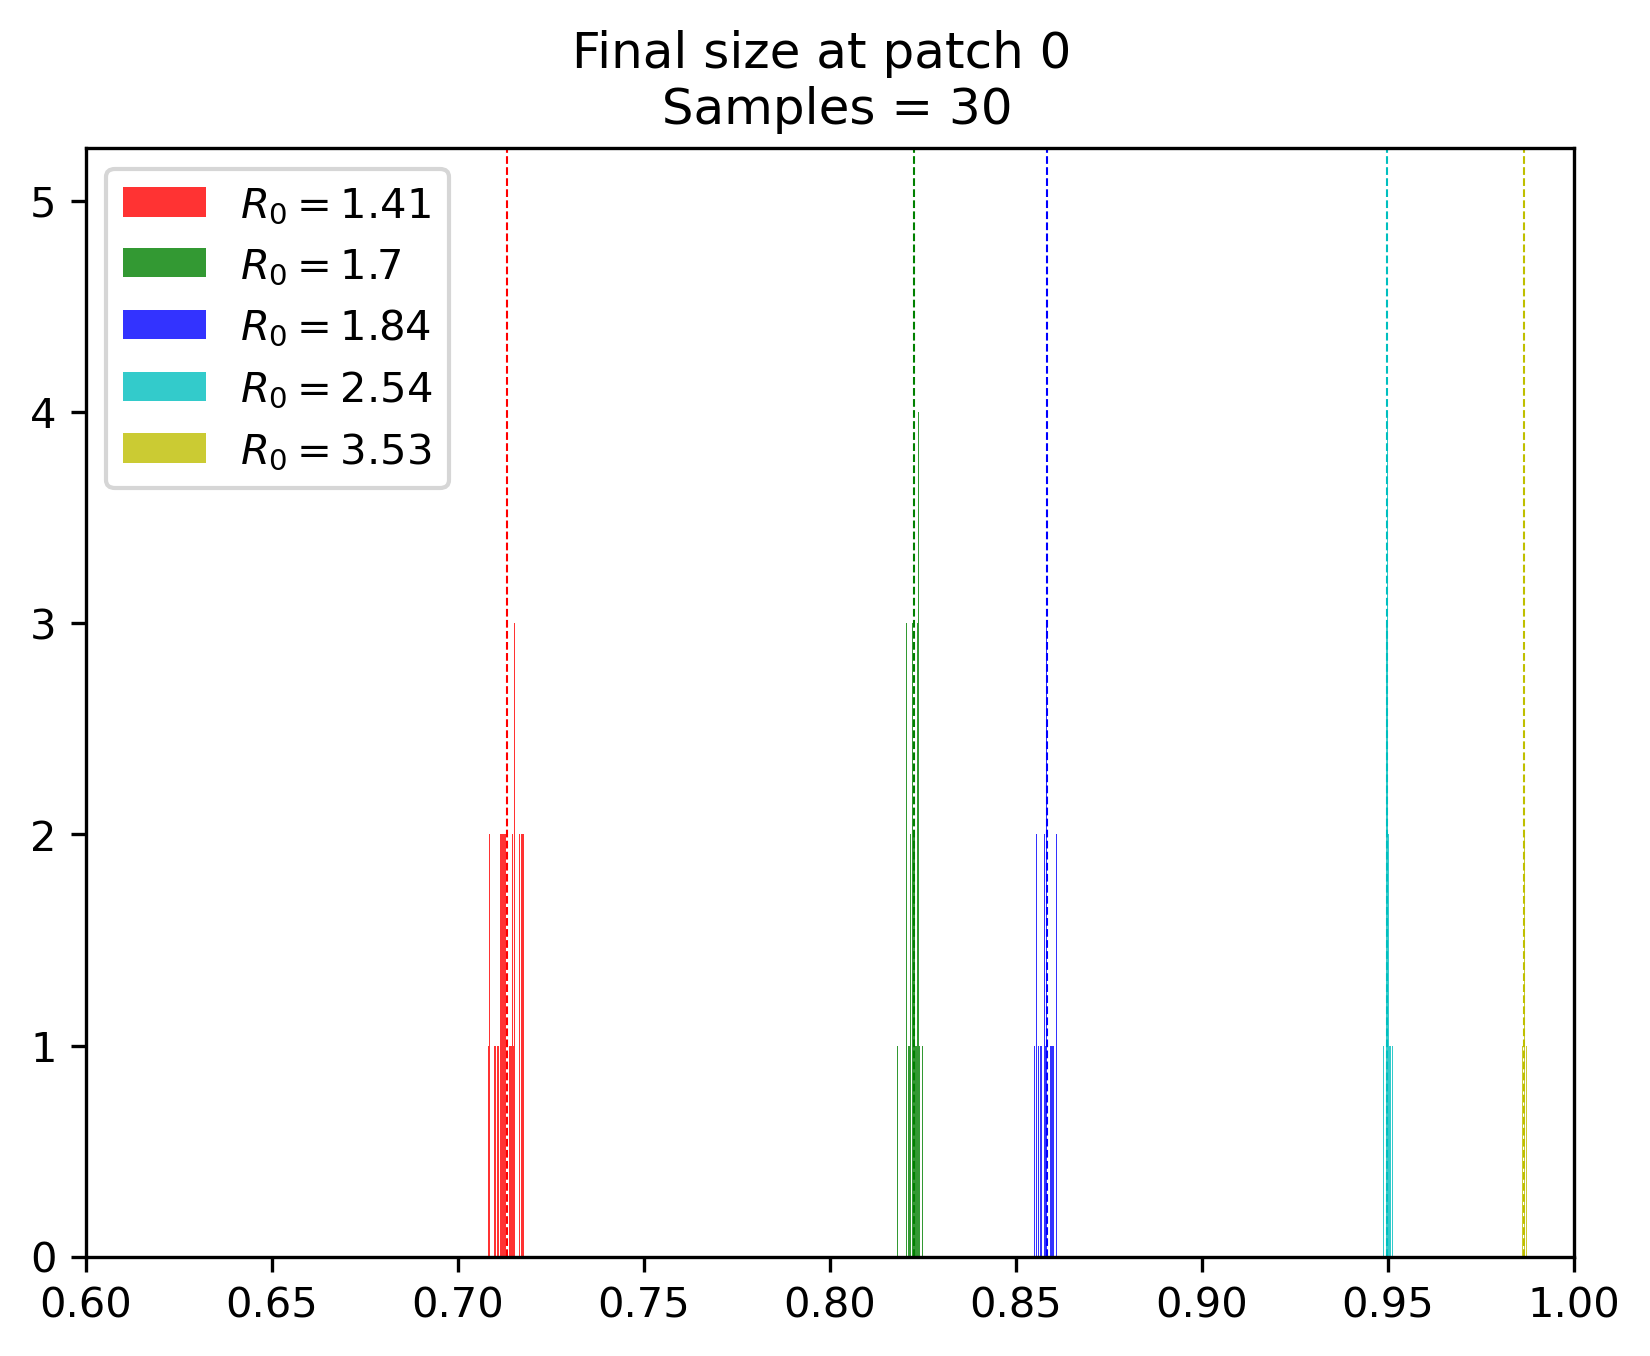

In [33]:
patch = 0
for k,dist in  enumerate(dists):
    plt.hist(dist[patch,:], bins=n_samples, color=colors[k], label=f'$R_0 = {r0s[k]}$', alpha=0.8)
    plt.axvline(np.mean(dist[patch,:], axis=0), color=colors[k], linestyle='dashed', linewidth=0.5)
plt.title(f'Final size at patch {patch} \n Samples = {n_samples}')
plt.xlim(0.6,1)
plt.legend()
plt.show()